In [ ]:
#!C:\Institutions\Gre\Apps\Anaconda3-2021.05\envs\NUSC\python.exe -m pip install --upgrade pip

In [ ]:
!pip install contractions
!pip install opendatasets
!pip install autocorrect
#!pip install gensim==4.0.0
!pip install python-Levenshtein

In [ ]:
!pip install -U --force-reinstall charset-normalizer --user

In [ ]:
!pip install -U --force-reinstall smart_open --user

In [ ]:
!pip install pyLDAvis

In [1]:
import gensim
print(gensim.__version__)

4.3.0


In [2]:
pwd

'C:\\Users\\qd9441q'

In [3]:
cd C:\Users\qd9441q\NUSCdata

C:\Users\qd9441q\NUSCdata


In [4]:
# library imports
import pandas as pd
import opendatasets
import contractions
from autocorrect import Speller
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import nltk
import re

In [5]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [6]:
pwd

'C:\\Users\\qd9441q\\NUSCdata'

In [7]:
#load scopus
scopus = pd.read_csv('scopus-PR.csv')
wos = pd.read_excel('WEBofScience.xls')

In [8]:
scopus

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,"Trung, Nguyen Dinh (57347739900); Huy, Dinh Tr...",57347739900; 36951633200; 6504732902; 57209248...,Optimizing the Interaction Between Two Closed-...,2022,Foundations of Computing and Decision Sciences,47,4,NaN,455,467,12.0,0,10.2478/fcds-2022-0025,https://www.scopus.com/inward/record.uri?eid=2...,"Over the past few years, attention to environm...",Closed-loop supply chain; game theory; out-of-...,Cell proliferation; Environmental regulations;...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85144205668
1,Thomas L.,"Thomas, Luisa (7403527708)",7403527708,Virtual Try-Before-You-Buy: The Impact of Virt...,2023,Developments in Marketing Science: Proceedings...,NaN,NaN,NaN,113,114,1.0,0,10.1007/978-3-031-24687-6_45,https://www.scopus.com/inward/record.uri?eid=2...,The rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...,NaN,Book chapter,Final,NaN,Scopus,2-s2.0-85151236694
2,Shu X.; Hu Z.,"Shu, Xinggang (58033251400); Hu, Zhenhua (5803...",58033251400; 58033251500,Pricing and Return Strategy Selection of Onlin...,2022,Processes,10,12,2490,NaN,NaN,NaN,0,10.3390/pr10122490,https://www.scopus.com/inward/record.uri?eid=2...,This article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...,NaN,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85144851926
3,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,"Fernando, Yudi (26664524300); Ahmad Jasmi, Muh...",26664524300; 57657917900; 57060524800; 5722126...,Supply chain integration and halal frozen meat...,2023,Journal of Islamic Marketing,14,5,NaN,1369,1395,26.0,3,10.1108/JIMA-05-2021-0144,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: Halal frozen meat product returns are...,Frozen meat; Halal integration; Halal logistic...,NaN,Article,Final,NaN,Scopus,2-s2.0-85129226144
4,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,"Guo, Qiang (56390923300); Zhao, Pengfei (57216...",56390923300; 57216782370; 58061258800; 5720181...,Two-period price competition of second-hand pr...,2023,Computers and Industrial Engineering,178,NaN,109131,NaN,NaN,NaN,0,10.1016/j.cie.2023.109131,https://www.scopus.com/inward/record.uri?eid=2...,Consumers who buy products from second-hand pl...,Blockchain; Demand levels; Different supply; P...,Blockchain; Costs; Decision making; Risk manag...,Article,Final,NaN,Scopus,2-s2.0-85150855485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,Mukhopadhyay S.K.; Setoputro R.,"Mukhopadhyay, Samar K. (7401807635); Setoputro...",7401807635; 15019683100,Reverse logistics in e-business: Optimal price...,2004,International Journal of Physical Distribution...,34,1,NaN,70,89,19.0,146,10.1108/09600030410515691,https://www.scopus.com/inward/record.uri?eid=2...,"In an Internet direct sales supply chain, the ...",Business policy; Direct selling; Internet mark...,NaN,Article,Final,NaN,Scopus,2-s2.0-84884324338
1681,Guide Jr. V.D.R.; Van Wassenhove L.N.,"Guide Jr., V. Daniel R. (55947490000); Van Was...",55947490000; 7004884518,Managing product returns for remanufacturing,2001,Production and Operations Management,10,2,NaN,142,155,13.0,543,10.1111/j.1937-5956.2001.tb00075.x,https://www.scopus.com/inward/record.uri?eid=2...,Firms are often encouraged to offer environmen...,Economic value-analysis; Product acquisition m...,NaN,Article,Final,NaN,Scopus,2-s2.0-0038967774
1682,McGuiness W.; Vella E.; Harrison D.,"McGuiness, W. (25931517200); Vella, E. (828605...",25931517200; 8286053900; 7403545948,Influence of dressing changes on wound tempera...,2004,Journal of wound care,13,9,NaN,383,385,2.0,84,10.12968/jowc.2004.13.9.26702,https://www.scopus.com/inward/record.ur

In [9]:
#select relevant columns
scopus_abstracts = scopus[['DOI','Authors','Title','Source title','Abstract','Author Keywords']]

wos_abstracts = wos[['DOI','Authors','Article Title','Source Title','Abstract','Author Keywords']]
wos_abstracts.columns = scopus_abstracts.columns

In [10]:
#merge two datasets
joint_abstracts = pd.concat([scopus_abstracts, wos_abstracts])

In [11]:
#check missing abstract
joint_abstracts.isna().sum()
joint_abstracts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 0 to 91
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DOI              1506 non-null   object
 1   Authors          1767 non-null   object
 2   Title            1777 non-null   object
 3   Source title     1776 non-null   object
 4   Abstract         1776 non-null   object
 5   Author Keywords  1457 non-null   object
dtypes: object(6)
memory usage: 97.2+ KB


In [12]:
#remove papers with missing abstracts
joint_abstracts = joint_abstracts.dropna(subset=['Abstract'],axis=0).reset_index(drop=True)
joint_abstracts

,DOI,Authors,Title,Source title,Abstract,Author Keywords
0,10.2478/fcds-2022-0025,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,Optimizing the Interaction Between Two Closed-...,Foundations of Computing and Decision Sciences,"Over the past few years, attention to environm...",Closed-loop supply chain; game theory; out-of-...
1,10.1007/978-3-031-24687-6_45,Thomas L.,Virtual Try-Before-You-Buy: The Impact of Virt...,Developments in Marketing Science: Proceedings...,The rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...
2,10.3390/pr10122490,Shu X.; Hu Z.,Pricing and Return Strategy Selection of Onlin...,Processes,This article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...
3,10.1108/JIMA-05-2021-0144,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,Supply chain integration and halal frozen meat...,Journal of Islamic Marketing,Purpose: Halal frozen meat product returns are...,Frozen meat; Halal integration; Halal logistic...
4,10.1016/j.cie.2023.109131,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,Two-period price competition of second-hand pr...,Computers and Industrial Engineering,Consumers who buy products from second-hand pl...,Blockchain; Demand levels; Different supply; P...
...,...,...,...,...,...,...
1771,10.3390/ijerph19159244,"Lyu, Shan; Chen, Yuyu; Wang, Lei",Optimal Decisions in a Multi-Party Closed-Loop...,International journal of environmental researc...,Global warming and e-waste pollution are two m...,NaN
1772,10.1016/j.resconrec.2015.02.009,"Agrawal, Saurabh; Singh, Rajesh K.; Murtaza, Q...",A literature review and perspectives in revers...,Resources Conservation and Recycling,"In recent years, reverse logistics (RL) has be...",NaN
1773,10.15847/cct.26508,"Pinho, Filipa; Marques, José Carlos; Góis, Pedro","Portugal e Espanha, países para regressar: Uma...","CIDADES, Comunidades e Territórios","Abstract In the international literature, ther...",NaN
1774,NaN,"Zhou,, Ying Yin",A study on the Hometown Returning Process of K...,THE YEOKSA AND SILHAK,This paper aims to study on the process of ret...,NaN


In [13]:
#check duplications from title
joint_abstracts['Title'] = joint_abstracts['Title'].str.lower()
joint_abstracts[joint_abstracts.duplicated(subset=['Title'], keep=False) == True].sort_values(by='Title')
index_drop_title = joint_abstracts[joint_abstracts.duplicated(subset=['Title'], keep='first') == True].sort_values(by='Title').index

joint_abstracts = joint_abstracts.drop(index_drop_title, axis='index')
joint_abstracts

,DOI,Authors,Title,Source title,Abstract,Author Keywords
0,10.2478/fcds-2022-0025,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,optimizing the interaction between two closed-...,Foundations of Computing and Decision Sciences,"Over the past few years, attention to environm...",Closed-loop supply chain; game theory; out-of-...
1,10.1007/978-3-031-24687-6_45,Thomas L.,virtual try-before-you-buy: the impact of virt...,Developments in Marketing Science: Proceedings...,The rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...
2,10.3390/pr10122490,Shu X.; Hu Z.,pricing and return strategy selection of onlin...,Processes,This article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...
3,10.1108/JIMA-05-2021-0144,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,supply chain integration and halal frozen meat...,Journal of Islamic Marketing,Purpose: Halal frozen meat product returns are...,Frozen meat; Halal integration; Halal logistic...
4,10.1016/j.cie.2023.109131,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,two-period price competition of second-hand pr...,Computers and Industrial Engineering,Consumers who buy products from second-hand pl...,Blockchain; Demand levels; Different supply; P...
...,...,...,...,...,...,...
1768,10.14695/KJSOS.2020.23.1.3,"kim, jisu; Joo, Na Young",online shopping: satisfaction of return servic...,Science of Emotion & Sensibility,"Recently, as the fashion e-commerce market has...",NaN
1770,NaN,"KIM, BYUNG IL; 이신희",a study on business year for gains and losses ...,KOOKMIN LAW REVIEW,A “purchase transaction under a special contra...,NaN
1771,10.3390/ijerph19159244,"Lyu, Shan; Chen, Yuyu; Wang, Lei",optimal decisions in a multi-party closed-loop...,International journal of environmental researc...,Global warming and e-waste pollution are two m...,NaN
1773,10.15847/cct.26508,"Pinho, Filipa; Marques, José Carlos; Góis, Pedro","portugal e espanha, países para regressar: uma...","CIDADES, Comunidades e Territórios","Abstract In the international literature, ther...",NaN


In [14]:
#detect duplications
joint_abstracts.dropna(subset=['DOI'], axis=0)[joint_abstracts.dropna(subset=['DOI'], axis=0).duplicated(subset=['DOI'], keep=False) == True].sort_values(by='DOI') #'first','last','False'
index_drop_doi = joint_abstracts.dropna(subset=['DOI'], axis=0)[joint_abstracts.dropna(subset=['DOI'], axis=0).duplicated(subset=['DOI'], keep='first') == True].index
#if you want to selectively remove you need to note the index of that row - for example 697
#for me, I trust the data quality of Scopus so I will remove the duplications from WoS -> as WOS was added later, we keep 'first'
joint_abstracts = joint_abstracts.drop(index_drop_doi, axis='index')
joint_abstracts = joint_abstracts.reset_index(drop=True)
joint_abstracts

,DOI,Authors,Title,Source title,Abstract,Author Keywords
0,10.2478/fcds-2022-0025,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,optimizing the interaction between two closed-...,Foundations of Computing and Decision Sciences,"Over the past few years, attention to environm...",Closed-loop supply chain; game theory; out-of-...
1,10.1007/978-3-031-24687-6_45,Thomas L.,virtual try-before-you-buy: the impact of virt...,Developments in Marketing Science: Proceedings...,The rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...
2,10.3390/pr10122490,Shu X.; Hu Z.,pricing and return strategy selection of onlin...,Processes,This article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...
3,10.1108/JIMA-05-2021-0144,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,supply chain integration and halal frozen meat...,Journal of Islamic Marketing,Purpose: Halal frozen meat product returns are...,Frozen meat; Halal integration; Halal logistic...
4,10.1016/j.cie.2023.109131,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,two-period price competition of second-hand pr...,Computers and Industrial Engineering,Consumers who buy products from second-hand pl...,Blockchain; Demand levels; Different supply; P...
...,...,...,...,...,...,...
1735,10.14695/KJSOS.2020.23.1.3,"kim, jisu; Joo, Na Young",online shopping: satisfaction of return servic...,Science of Emotion & Sensibility,"Recently, as the fashion e-commerce market has...",NaN
1736,NaN,"KIM, BYUNG IL; 이신희",a study on business year for gains and losses ...,KOOKMIN LAW REVIEW,A “purchase transaction under a special contra...,NaN
1737,10.3390/ijerph19159244,"Lyu, Shan; Chen, Yuyu; Wang, Lei",optimal decisions in a multi-party closed-loop...,International journal of environmental researc...,Global warming and e-waste pollution are two m...,NaN
1738,10.15847/cct.26508,"Pinho, Filipa; Marques, José Carlos; Góis, Pedro","portugal e espanha, países para regressar: uma...","CIDADES, Comunidades e Territórios","Abstract In the international literature, ther...",NaN


In [15]:
# initiate tqdm for pandas.apply() functions
# for checking runing progress
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [16]:
#check missing abstract
def missing_abstract(x):
  if x == '':
    return 'no abstract'
  else:
    return 'ok'

joint_abstracts['Checked_abstract'] = joint_abstracts['Abstract'].progress_apply(lambda x: missing_abstract(x))

  0%|          | 0/1740 [00:00<?, ?it/s]

In [17]:
#Lowercase your abstracts
joint_abstracts['Abstract'] = joint_abstracts['Abstract'].str.lower()

In [18]:
#remove slang
import regex as re
def clean_slang(text): 
    """
    Correct common slang and abbreviations.
    """
    text = re.sub(r"\babt?\b", "about", text)
    text = re.sub(r"\bcomfy\b", "comfortable", text)
    text = re.sub(r"\brll?y\b", "really", text)
    text = re.sub(r"\bso{2,}\b", "so", text)
    text = re.sub(r"\bmed\b", "medium", text)
    text = re.sub(r"\bxx?s\b", "extra small", text)
    text = re.sub(r"\bxx?l\b", "extra large", text)
    text = re.sub(r"\bfab\b", "fabulous", text)
    text = re.sub(r"\bblk\b", "black", text)
    text = re.sub(r"\bpromo\b", "promotion", text)
    text = re.sub(r"\btts\b", "true to size", text)
    text = re.sub(r"\blbs?\b", "pounds", text)
    text = re.sub(r"\brn\b", "right now", text)
    text = re.sub(r"\bwanna\b", "want to", text)
    text = re.sub(r"\bgonn[ao]\b", "going to", text)
    text = re.sub(r"\btho\b", "though", text)
    text = re.sub(r"altho ", "although ", text)
    text = re.sub(r"prolly", "probably", text)
    text = re.sub(r"asap", "as soon as possible", text)
    text = re.sub(r"\bbc|b/c\b", "because", text)
    text = re.sub(r"\bavail\b", "available", text)
    text = re.sub(r"\bdiff\b", "different", text)
    text = re.sub(r"\bnxt|enxt\b", "next", text)
    text = re.sub(r" w/ ", " with ", text)
    text = re.sub(r"\bdidn ", "didn't ", text)
    text = re.sub(r" dnt ", " don't ", text)
    text = re.sub(r"\bsnd\b", "send", text)
    text = re.sub(r"b4\b", "before", text)
    text = re.sub(r"stink'n", "stinking", text)
    text = re.sub(r"\batm\b", "at the moment", text)
    text = re.sub(r"\besp\b", "especially", text)
    text = re.sub(r"\bavg\b", "average", text)
    text = re.sub(r"(\d'|\d\")\s?(\d+'|\d+\")?", " ", text) # removes height measurements
    text = re.sub(r"'\d+\w+'", " ", text) 
    text = re.sub(r"\s{2,}", " ", text).strip()
    return text

In [19]:
a = 'I want to finish this asap'
b = 'The house is rlly big'
c = "I'm doing homework atm"
clean_slang(c)

"I'm doing homework at the moment"

In [20]:
joint_abstracts['Abstract'] = joint_abstracts['Abstract'].progress_apply(clean_slang) # or lambda x: clean_slang(x)

  0%|          | 0/1740 [00:00<?, ?it/s]

In [21]:
def cont_expand(text):
    """
    Expand contractions (i.e don't->do not, can't-> cannot).
    """
    expanded_text = contractions.fix(text, slang=False)
    return expanded_text
a = "I can't do that job"
cont_expand(a)

'I cannot do that job'

In [22]:
# expand contractions
joint_abstracts['Abstract'] = joint_abstracts['Abstract'].progress_apply(cont_expand)

  0%|          | 0/1740 [00:00<?, ?it/s]

In [23]:
#Customise cleaning function
#Depending on your data noises
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
def tokenizer(x):
  return word_tokenize(x)

import string
def customised_cleaning_function(x):
    #first have to remove punctuations - some topic models don't require this stage to retain the contextual meaning - for example - Deep learning topic model
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    x = re_punc.sub("", x)
    # remove copyright notes
    x = re.sub(r'\©.+','',x)
    x = re.sub(r'\(c\)\s\d{4}.+','',x)
    list_of_copyrights = ['\[copyright &y& elsevier\].+','\[abstract from author].+']
    x = re.sub(r'|'.join(list_of_copyrights),'',x)
    #tokenize the abstract into a list of words
    x = tokenizer(x) # or x = x.split(" ")
    #remove all tokens that are not alphabetic
    x = [word for word in x if word.isalpha()] 
    # filter out short tokens
    x = [word for word in x if len(word) > 1]
    x = " ".join(x)
    # strip multiple spaces
    x = re.sub(' +',' ', x)
    x = re.sub("\n","", x)
    x = re.sub(r"'s\b","", x)
    return x

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qd9441q\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
joint_abstracts['Abstract'][12]

'despite growing interest in the return of rejected asylum seekers, irregular migrants, and refugees, we do not know enough about how geopolitics affects returns governance. this article addresses this knowledge gap by analysing the case of turkey, exploring how positions in the global migration regime and relations with countries of origin influence return policies. it first argues that turkey’s geopolitical reasoning has led it to design an asylum regime, including repatriation and deportation procedures, centred on temporariness. second, it contends that turkey’s extraterritorial space-making strategies–namely, military intervention in syria and humanitarian/development projects in afghanistan–guide return policies. examining the turkish case contributes to our understanding of national returns governance in transit-turned-host countries, which increasingly emphasise repatriation over long-term protection. finally, the paper contributes more generally to our understanding of the geo

In [25]:
customised_cleaning_function(joint_abstracts['Abstract'][12])

'despite growing interest in the return of rejected asylum seekers irregular migrants and refugees we do not know enough about how geopolitics affects returns governance this article addresses this knowledge gap by analysing the case of turkey exploring how positions in the global migration regime and relations with countries of origin influence return policies it first argues that turkey geopolitical reasoning has led it to design an asylum regime including repatriation and deportation procedures centred on temporariness second it contends that turkey extraterritorial spacemaking military intervention in syria and humanitariandevelopment projects in return policies examining the turkish case contributes to our understanding of national returns governance in transitturnedhost countries which increasingly emphasise repatriation over longterm protection finally the paper contributes more generally to our understanding of the geopolitics of returns by focusing on specific mechanisms that 

In [26]:
# expand contractions
joint_abstracts['Abstract'] = joint_abstracts['Abstract'].progress_apply(customised_cleaning_function)

  0%|          | 0/1740 [00:00<?, ?it/s]

In [27]:
#tokenize words
joint_abstracts['Abs_list_words'] = joint_abstracts['Abstract'].progress_apply(tokenizer)
data_words = list(joint_abstracts['Abs_list_words'])

  0%|          | 0/1740 [00:00<?, ?it/s]

In [28]:
import gensim
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10, max_vocab_size=40000000, 
                               delimiter='_', progress_per=10000, scoring='default',
                               connector_words=ENGLISH_CONNECTOR_WORDS) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20,connector_words=ENGLISH_CONNECTOR_WORDS)
# Faster way to get a sentence clubbed as a trigram/bigram for one single
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Define functions for bigrams and trigrams for multiple documents
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [29]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[12]]])

['despite', 'growing', 'interest', 'in', 'the', 'return', 'of', 'rejected', 'asylum_seekers', 'irregular_migrants', 'and', 'refugees', 'we', 'do_not', 'know', 'enough', 'about', 'how', 'geopolitics', 'affects', 'returns', 'governance', 'this_article', 'addresses', 'this', 'knowledge', 'gap', 'by', 'analysing', 'the', 'case', 'of', 'turkey', 'exploring', 'how', 'positions', 'in', 'the', 'global', 'migration', 'regime', 'and', 'relations', 'with', 'countries_of_origin', 'influence', 'return_policies', 'it', 'first', 'argues_that', 'turkey', 'geopolitical', 'reasoning', 'has_led', 'it', 'to', 'design', 'an', 'asylum', 'regime', 'including', 'repatriation', 'and', 'deportation', 'procedures', 'centred', 'on', 'temporariness', 'second', 'it', 'contends', 'that', 'turkey', 'extraterritorial', 'spacemaking', 'military', 'intervention', 'in', 'syria', 'and', 'humanitariandevelopment', 'projects', 'in', 'return_policies', 'examining', 'the', 'turkish', 'case', 'contributes', 'to', 'our', 'under

In [30]:
# NLTK Stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
  
stop_words = stopwords.words('english')
stop_words.extend(['would','could','product','return'])
#you can remove a stopword by using
#stop_words.remove(['would','could'])

# Define functions for stopwords
def remove_stopwords(texts):
    return [[word for word in doc if word not in stop_words] for doc in texts]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qd9441q\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import spacy
#!pip install --upgrade click
#!python -m spacy download en
#!python -m spacy download en_core_web_sm
# Define functions for lemmatization
nlp = spacy.load("en_core_web_sm")

def lemmatization(texts, allowed_postags=['NOUN','ADJ', 'VERB','PROPN','ADV','PROP']):
    """https://spacy.io/usage/linguistic-features"""
    """https://github.com/explosion/spaCy/blob/master/spacy/glossary.py"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()

def stemming(texts):
    texts_out = []
    for doc in texts:
        texts_out.append([stemmer.stem(token) for token in doc])
    return texts_out

In [32]:
# Do lemmatization
data_lemmatized = lemmatization(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_lemmatized)

# Form Bigrams
data_words_trigrams = make_bigrams(data_words_bigrams)

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words_trigrams)

print(data_words_nostops[20])

['rise', 'consumer', 'concern', 'business', 'responsibility', 'environment', 'closedloop_supply', 'chain', 'green', 'design', 'consider', 'reverse_logistic', 'return_policy', 'receive', 'attention', 'due', 'increase', 'consumer', 'concern', 'corporate', 'responsibility', 'environment', 'hence', 'article', 'present', 'sustainable', 'supply_chain', 'model', 'waste', 'reduction', 'incorporate', 'reverse_logistic', 'operation', 'suitable', 'return_policy', 'discuss', 'deteriorate', 'item', 'incorporate', 'ecodesign', 'framework', 'carbon_emission', 'major', 'environmental', 'issue', 'penalty', 'tax', 'pollute', 'introduce', 'reduce', 'carbon_emission', 'model', 'consider', 'cost', 'carbon_emission', 'transportation', 'storage', 'production', 'landfille', 'building', 'construction', 'power', 'supply', 'loadingunloade', 'previous', 'study', 'study', 'investigate', 'compare', 'optimization', 'technique', 'base', 'cooperative', 'noncooperative', 'association', 'mathematical', 'formulation', 'p

In [55]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_nostops)
id2word.filter_extremes(no_below=0.2, no_above = 0.8)

# Create Corpus
texts = data_words_nostops

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[0])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 7), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 3), (45, 1), (46, 3), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 3), (80, 1), (81, 2), (82, 1), (83, 1)]


In [34]:
id2word[1]

'activity'

In [35]:
data_words_nostops[0]

['past',
 'year',
 'attention',
 'environmental',
 'problem',
 'legal',
 'necessity',
 'economic',
 'advantage',
 'emerge',
 'reproduction',
 'activity',
 'attract',
 'attention',
 'reverse_logistic',
 'activity',
 'form',
 'closedloop_supply',
 'chain',
 'industry',
 'scientific',
 'research',
 'current',
 'study',
 'aim',
 'model',
 'competitiveness',
 'comparison',
 'closedloop',
 'threelevel',
 'supply_chain',
 'include',
 'manufacturer',
 'retailer',
 'third_party',
 'collect',
 'use',
 'customer',
 'take',
 'account',
 'concept',
 'game_theory',
 'existence',
 'aggregate',
 'moreover',
 'separate',
 'supplier',
 'chain',
 'consider',
 'forward_supply',
 'chain',
 'manufacturer',
 'produce',
 'new',
 'use',
 'new',
 'component',
 'reuse',
 'collect',
 'consumer',
 'sell',
 'mainly',
 'retailer',
 'retailer',
 'sell',
 'reverse',
 'chain',
 'collector',
 'provide',
 'use',
 'manufacturer',
 'collection',
 'study',
 'utilize',
 'definition',
 'concept',
 'game_theory',
 'model',
 'c

In [99]:
%%time
import gensim
from pprint import pprint

# Build LDA model
# https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10, #this will be tuned later
                                            random_state= 9,
                                            update_every=1, #Number of documents to be iterated through for each update. Set to 0 for batch learning, > 1 for online iterative learning.
                                            alpha='auto',
                                            eta = 'auto',
                                            iterations = 1000,
                                            per_word_topics=True,
                                            minimum_probability = 0.0
                                           )
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_topics = 10, num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.021*"retailer" + 0.012*"consumer" + 0.011*"customer" + 0.009*"model" + '
  '0.008*"use" + 0.007*"study" + 0.007*"supply_chain" + 0.006*"return_policy" '
  '+ 0.006*"manufacturer" + 0.006*"profit"'),
 (1,
  '0.011*"model" + 0.011*"use" + 0.009*"cost" + 0.008*"retailer" + '
  '0.008*"customer" + 0.007*"return_policy" + 0.006*"policy" + 0.005*"study" + '
  '0.005*"optimal" + 0.005*"result"'),
 (2,
  '0.008*"policy" + 0.008*"use" + 0.006*"model" + 0.006*"study" + '
  '0.005*"reverse_logistic" + 0.005*"result" + 0.005*"return_policy" + '
  '0.004*"approach" + 0.004*"supply_chain" + 0.004*"provide"'),
 (3,
  '0.011*"retailer" + 0.011*"consumer" + 0.010*"study" + 0.008*"manufacturer" '
  '+ 0.008*"use" + 0.007*"online" + 0.007*"return_policy" + 0.006*"channel" + '
  '0.006*"model" + 0.006*"reverse_logistic"'),
 (4,
  '0.012*"use" + 0.011*"model" + 0.010*"consumer" + 0.010*"study" + '
  '0.009*"return_policy" + 0.008*"customer" + 0.008*"policy" + '
  '0.006*"retailer" + 0.006*"result

In [42]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. the lower of the absolute value the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.782849875068148

Coherence Score:  0.36891630129257796


In [100]:
# Gensim
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list: List of LDA topic models
    perplexity_values: Coherence values corresponding to the LDA model with respective number of topics
    coherence_values: Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    perplexity_values = []
    count = 0
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics, #this will be tuned later
                                            random_state= 9,
                                            update_every=1, # Number of documents to be iterated through for each update. Set to 0 for batch learning, > 1 for online iterative learning.
                                            alpha='auto',
                                            eta = 'auto',
                                            iterations = 1000,
                                            per_word_topics=True,
                                            minimum_probability = 0.0)
        model_list.append(model)
        perplexity_values.append(model.log_perplexity(corpus))
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        count+=1
        print(count)
    return model_list, coherence_values, perplexity_values
# Can take a long time to run.
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=id2word, corpus=corpus, 
                                                                           texts=data_words_nostops, start=2, 
                                                                           limit=12, step=1) # 52 or 72

1
2
3
4
5
6
7
8
9
10


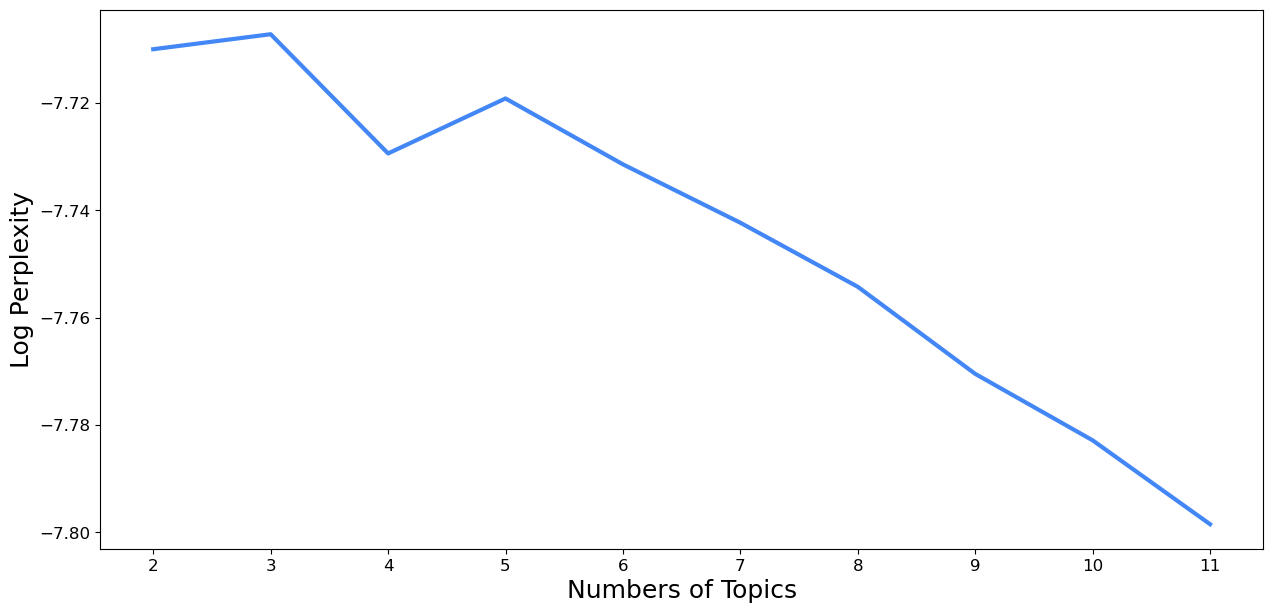

In [103]:
# Get the number of topics with the highest coherence score
import numpy as np
from operator import itemgetter, attrgetter
limit=12; start=2; step=1;
x = range(start, limit, step)
scores = list(zip(x, perplexity_values))

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    x,
    perplexity_values,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Numbers of Topics", fontsize=18)
plt.ylabel("Log Perplexity", fontsize=18)
plt.xticks(np.arange(2, max(x) + 1, 1), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [52]:
np.arange(2, max(x) + 1, 1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

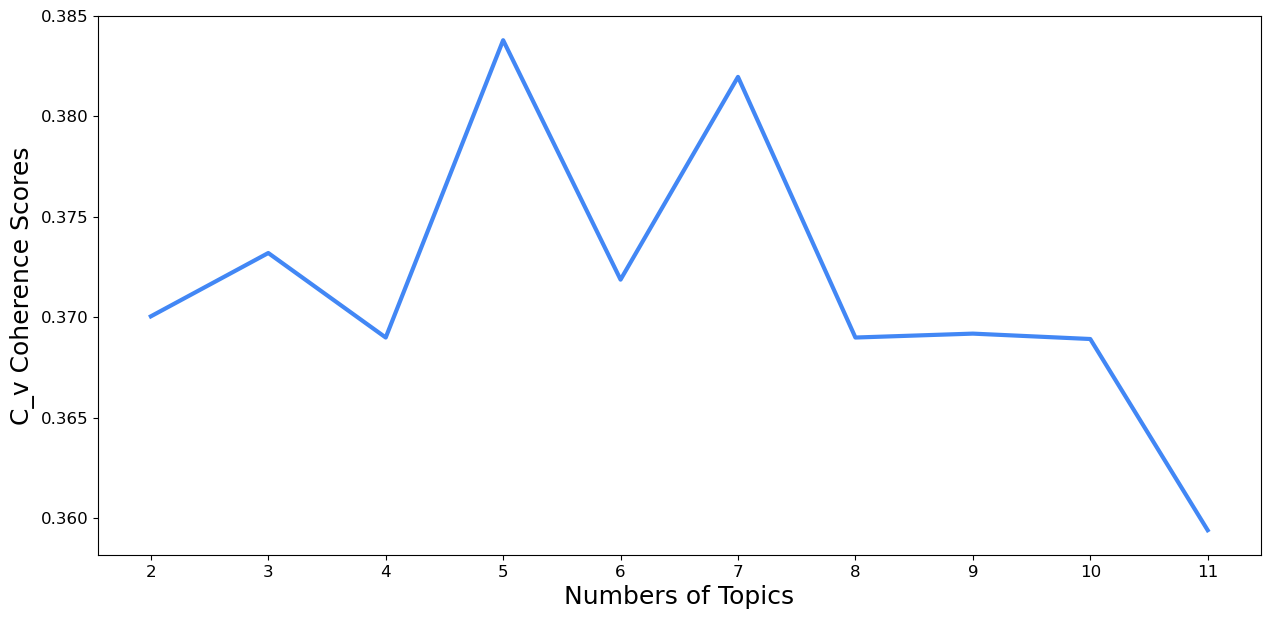

In [104]:
# Get the number of topics with the highest coherence score
from operator import itemgetter, attrgetter
limit=12; start=2; step=1;
x = range(start, limit, step)
scores = list(zip(x, coherence_values))

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    x,
    coherence_values,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Numbers of Topics", fontsize=18)
plt.ylabel("C_v Coherence Scores", fontsize=18)
plt.xticks(np.arange(2, max(x) + 1, 1), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [105]:
import gensim
from pprint import pprint

# Build LDA model
# https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state= 9,
                                            update_every=1, #Number of documents to be iterated through for each update. Set to 0 for batch learning, > 1 for online iterative learning.
                                            alpha='auto',
                                            eta = 'auto',
                                            iterations = 1000,
                                            per_word_topics=True,
                                            minimum_probability = 0.0
                                           )
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_topics = 5, num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.018*"retailer" + 0.011*"consumer" + 0.009*"model" + 0.009*"customer" + '
  '0.008*"use" + 0.008*"return_policy" + 0.008*"manufacturer" + '
  '0.007*"supply_chain" + 0.007*"study" + 0.006*"paper"'),
 (1,
  '0.011*"model" + 0.009*"use" + 0.008*"cost" + 0.008*"retailer" + '
  '0.007*"return_policy" + 0.006*"study" + 0.006*"customer" + 0.005*"decision" '
  '+ 0.005*"paper" + 0.005*"policy"'),
 (2,
  '0.010*"policy" + 0.007*"model" + 0.006*"use" + 0.005*"supply_chain" + '
  '0.005*"result" + 0.005*"retailer" + 0.005*"process" + 0.005*"study" + '
  '0.005*"chain" + 0.004*"return_policy"'),
 (3,
  '0.010*"study" + 0.010*"retailer" + 0.010*"consumer" + 0.008*"manufacturer" '
  '+ 0.007*"use" + 0.007*"return_policy" + 0.006*"online" + 0.006*"model" + '
  '0.005*"information" + 0.005*"supply_chain"'),
 (4,
  '0.011*"model" + 0.010*"use" + 0.010*"return_policy" + 0.009*"study" + '
  '0.009*"consumer" + 0.008*"policy" + 0.007*"customer" + 0.007*"retailer" + '
  '0.005*"result" + 0.005*"p

In [106]:
#!pip install pyLDAvis
# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim  for old versions of pyLDAvis
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models
%matplotlib inline

# Visualize the topics 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds', sort_topics=False, R=10)

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.025376  0.028773       1        1  32.631361
1      0.002090 -0.043297       2        1  17.591478
2     -0.063767 -0.016980       3        1   9.189641
3     -0.015085  0.047358       4        1  19.156862
4      0.051386 -0.015854       5        1  21.430657, topic_info=                 Term        Freq        Total Category  logprob  loglift
375            policy  910.000000   910.000000  Default  10.0000  10.0000
44       manufacturer  868.000000   868.000000  Default   9.0000   9.0000
66   reverse_logistic  503.000000   503.000000  Default   8.0000   8.0000
110            design  395.000000   395.000000  Default   7.0000   7.0000
24               cost  830.000000   830.000000  Default   6.0000   6.0000
..                ...         ...          ...      ...      ...      ...
298            system  184.378971   651.212529   Topic5  -5.2765   0.2785
232             price  166.675635   589.679142   Topic5  -5.3774   0.2768
61             result  195.593835   864.056394   Topic5  -5.2174   0.0547
63           retailer  249.405509  1859.307794   Topic5  -4.9744  -0.4685
281             paper  193.149978   902.873508   Topic5  -5.2300  -0.0018

[157 rows x 6 columns], token_table=       Topic      Freq               Term
term                                     
7187       1  0.050633          adherence
7187       4  0.911396          adherence
7895       3  0.915476  animal_production
9072       5  0.947404         antibiotic
432        1  0.339268           approach
...      ...       ...                ...
1992       3  0.022843            website
1992       4  0.639615            website
1992       5  0.159904            website
11103      5  0.966675              wuhan
10572      2  0.954507               zinc

[326 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [148]:
#Save LDAvis
pyLDAvis.save_html(vis, 'lda_v1.html')

In [75]:
import warnings
warnings.filterwarnings("ignore")

In [142]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
#merge with the original documents
df_dominant_topic = df_dominant_topic.join(joint_abstracts)
# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,DOI,Authors,Title,Source title,Abstract,Author Keywords,Checked_abstract,Abs_list_words
0,0,0,0.9983,"retailer, consumer, model, customer, use, retu...","[past, year, attention, environmental, problem...",10.2478/fcds-2022-0025,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,optimizing the interaction between two closed-...,Foundations of Computing and Decision Sciences,over the past few years attention to environme...,Closed-loop supply chain; game theory; out-of-...,ok,"[over, the, past, few, years, attention, to, e..."
1,1,0,0.9989,"retailer, consumer, model, customer, use, retu...","[rise, digital, technology, online, business, ...",10.1007/978-3-031-24687-6_45,Thomas L.,virtual try-before-you-buy: the impact of virt...,Developments in Marketing Science: Proceedings...,the rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...,ok,"[the, rise, of, digital, technologies, and, on..."
2,2,0,0.5030,"retailer, consumer, model, customer, use, retu...","[article, mainly, consider, coexistence, physi...",10.3390/pr10122490,Shu X.; Hu Z.,pricing and return strategy selection of onlin...,Processes,this article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...,ok,"[this, article, mainly, considers, the, coexis..."
3,3,0,0.9983,"retailer, consumer, model, customer, use, retu...","[purpose, halal, frozen, meat, major, challeng...",10.1108/JIMA-05-2021-0144,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,supply chain integration and halal frozen meat...,Journal of Islamic Marketing,purpose halal frozen meat product returns are ...,Frozen meat; Halal integration; Halal logistic...,ok,"[purpose, halal, frozen, meat, product, return..."
4,4,0,0.9979,"retailer, consumer, model, customer, use, retu...","[consumer, buy, secondhand, platform, trouble,...",10.1016/j.cie.2023.109131,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,two-period price competition of second-hand pr...,Computers and Industrial Engineering,consumers who buy products from secondhand pla...,Blockchain; Demand levels; Different supply; P...,ok,"[consumers, who, buy, products, from, secondha..."
5,5,0,0.9977,"retailer, consumer, model, customer, use, retu...","[virtual_reality, become, new, option, inform,...",10.1007/978-3-031-29315-3_6,Alaei A.M.; Rasti-Barzoki M.; Altmann J.; Egge...,a game-theoretic approach for pricing and dete...,Lecture Notes in Computer Science (including s...,virtual reality has become new option to infor...,Cybersecurity; Game theory; Pricing; Return po...,ok,"[virtual, reality, has, become, new, option, t..."
6,6,2,0.9980,"policy, model, use, supply_chain, result, reta...","[background, reverse_logistic, study, receive,...",10.17270/J.LOG.2023.818,Zhao W.; Bin Osman L.H.,a systematic review of the use of organisation...,Logforum,background reverse logistics studies have rece...,organisational and management theories; revers...,ok,"[background, reverse, logistics, studies, have..."
7,7,2,0.9980,"policy, model, use, supply_chain, result, reta...","[contemporary, business, model, need, reimagin...",10.1080/09537287.2023.2197851,Butt A.S.; Ali I.; Govindan K.,the role of reverse logistics in a circular ec...,Production Planning and Control,contemporary business models need to reimagine...,case study; circular economy; retailers; Rever...,ok,"[contemporary, business, models, need, to, rei..."
8,8,0,0.8092,"retailer, consumer, model, customer, use, retu...","[purpose, reverse_supply, chain, rsc, way, han...",10.1108/BIJ-08-2021-0467,Agrawal S.; Kumar D.; Singh R.K.; Singh R.K.,coordination issues in managing the reverse su...,Benchmarking,purpose reverse supply chain rsc is one of the...,Coordination; Green supply chain; Remanufactur...,ok,"[purpose, reverse, supply, chain, rsc, is, one..."
9,9,4,0.9981,"model, use, return_policy, study, consumer, po...","[work, consider, omnichannel, retailer, sell, ...",10.1016/j.ejor.2022

In [140]:
#Get the most representative documents per topic
topicn = 0
subset = df_dominant_topic[df_dominant_topic.Dominant_Topic == 0].sort_values(by='Topic_Perc_Contrib', ascending= False)
subset

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
259,259,0,0.9996,"retailer, consumer, model, customer, use, retu...","[development, ecommerce, online_shopping, plat..."
1736,1736,0,0.9995,"retailer, consumer, model, customer, use, retu...","[purchase, transaction, special, contract, mea..."
34,34,0,0.9995,"retailer, consumer, model, customer, use, retu...","[absence, physical, evaluation, online_shoppin..."
234,234,0,0.9994,"retailer, consumer, model, customer, use, retu...","[recent, year, popularization, internet, elect..."
462,462,0,0.9994,"retailer, consumer, model, customer, use, retu...","[rapid_development, global, market, informatio..."
...,...,...,...,...,...
1385,1385,0,0.5017,"retailer, consumer, model, customer, use, retu...","[paper, study, coordination_mechanism, supply_..."
877,877,0,0.5008,"retailer, consumer, model, customer, use, retu...","[paper, problem, coordination, policy, investi..."
400,400,0,0.4760,"retailer, consumer, model, customer, use, retu...","[increase, number, omnichannel, retailer, oper..."
198,198,0,0.4446,"retailer, consumer, model, customer, use, retu...","[work, new, model, develop, determine, optimum..."


In [137]:
# Get topic distribution per document

optimal_topics = 5
distribution = []
for i, row in enumerate(lda_model[corpus]):
  distribution.append([per for per in row])

distribution = pd.DataFrame([doc[0] for doc in distribution], columns = [f'Topic {i}'.format(i=i) for i in range(optimal_topics)])

def strip_topnum(x):
    return x[1]
for i in distribution.columns:
    distribution[i] = distribution[i].progress_apply(strip_topnum)

distribution.head(5)

  0%|          | 0/1740 [00:00<?, ?it/s]

  0%|          | 0/1740 [00:00<?, ?it/s]

  0%|          | 0/1740 [00:00<?, ?it/s]

  0%|          | 0/1740 [00:00<?, ?it/s]

  0%|          | 0/1740 [00:00<?, ?it/s]

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,0.998260,0.000458,0.000132,0.000580,0.000570
1,0.998929,0.000282,0.000081,0.000357,0.000351
2,0.503031,0.000471,0.000136,0.495777,0.000586
3,0.998275,0.000454,0.000131,0.000575,0.000565
4,0.997874,0.000560,0.000161,0.000709,0.000696


In [147]:
df_dominant_topic = df_dominant_topic.join(distribution)
df_dominant_topic.to_csv('LDA_result_v1.csv')
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,DOI,Authors,Title,Source title,Abstract,Author Keywords,Checked_abstract,Abs_list_words,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,0,0,0.9983,"retailer, consumer, model, customer, use, retu...","[past, year, attention, environmental, problem...",10.2478/fcds-2022-0025,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,optimizing the interaction between two closed-...,Foundations of Computing and Decision Sciences,over the past few years attention to environme...,Closed-loop supply chain; game theory; out-of-...,ok,"[over, the, past, few, years, attention, to, e...",0.998260,0.000458,0.000132,0.000580,0.000570
1,1,0,0.9989,"retailer, consumer, model, customer, use, retu...","[rise, digital, technology, online, business, ...",10.1007/978-3-031-24687-6_45,Thomas L.,virtual try-before-you-buy: the impact of virt...,Developments in Marketing Science: Proceedings...,the rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...,ok,"[the, rise, of, digital, technologies, and, on...",0.998929,0.000282,0.000081,0.000357,0.000351
2,2,0,0.5030,"retailer, consumer, model, customer, use, retu...","[article, mainly, consider, coexistence, physi...",10.3390/pr10122490,Shu X.; Hu Z.,pricing and return strategy selection of onlin...,Processes,this article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...,ok,"[this, article, mainly, considers, the, coexis...",0.503031,0.000471,0.000136,0.495777,0.000586
3,3,0,0.9983,"retailer, consumer, model, customer, use, retu...","[purpose, halal, frozen, meat, major, challeng...",10.1108/JIMA-05-2021-0144,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,supply chain integration and halal frozen meat...,Journal of Islamic Marketing,purpose halal frozen meat product returns are ...,Frozen meat; Halal integration; Halal logistic...,ok,"[purpose, halal, frozen, meat, product, return...",0.998275,0.000454,0.000131,0.000575,0.000565
4,4,0,0.9979,"retailer, consumer, model, customer, use, retu...","[consumer, buy, secondhand, platform, trouble,...",10.1016/j.cie.2023.109131,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,two-period price competition of second-hand pr...,Computers and Industrial Engineering,consumers who buy products from secondhand pla...,Blockchain; Demand levels; Different supply; P...,ok,"[consumers, who, buy, products, from, secondha...",0.997874,0.000560,0.000161,0.000709,0.000696


In [78]:
!pip install bokeh

                                              0.0/8.3 MB ? eta -:--:--
     ---                                      0.8/8.3 MB 16.7 MB/s eta 0:00:01
     ---------                                2.0/8.3 MB 20.9 MB/s eta 0:00:01
     ----------------                         3.4/8.3 MB 24.3 MB/s eta 0:00:01
     ------------------------                 5.2/8.3 MB 27.5 MB/s eta 0:00:01
     --------------------------------         6.8/8.3 MB 29.0 MB/s eta 0:00:01
     ---------------------------------------  8.3/8.3 MB 31.2 MB/s eta 0:00:01
     ---------------------------------------  8.3/8.3 MB 31.2 MB/s eta 0:00:01
     ---------------------------------------- 8.3/8.3 MB 23.0 MB/s eta 0:00:00
                                              0.0/56.5 kB ? eta -:--:--
     ---------------------------------------- 56.5/56.5 kB 3.1 MB/s eta 0:00:00


In [155]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=3,verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics)
              )
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,0], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1740 samples in 0.000s...
[t-SNE] Computed neighbors for 1740 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1740
[t-SNE] Computed conditional probabilities for sample 1740 / 1740
[t-SNE] Mean sigma: 0.000111
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.991268
[t-SNE] KL divergence after 1000 iterations: 0.200056


Loading BokehJS ...

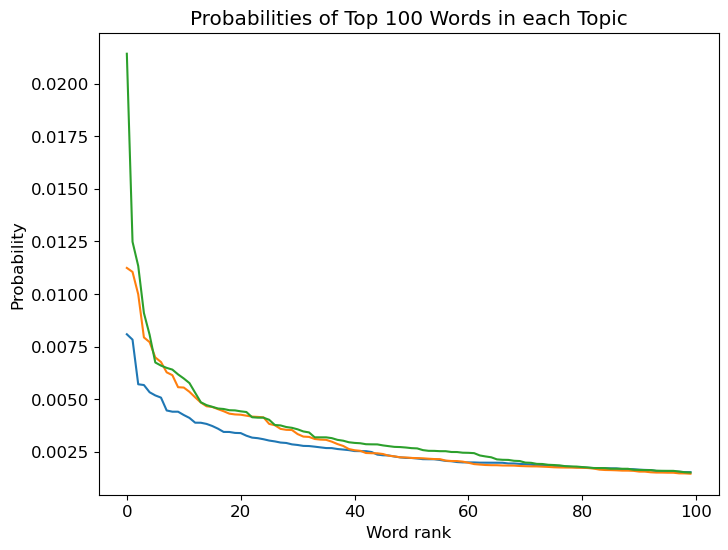

In [41]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

# top 100 words by weight in each topic
top_n_words = 100
topics = lda_model.show_topics(
    num_topics = 10, num_words = top_n_words, formatted = False)

for _, infos in topics:
    probs = [prob for _, prob in infos]
    plt.plot(range(top_n_words), probs)

plt.xlabel('Word rank')
plt.ylabel('Probability')
plt.title('Probabilities of Top 100 Words in each Topic')
plt.show()

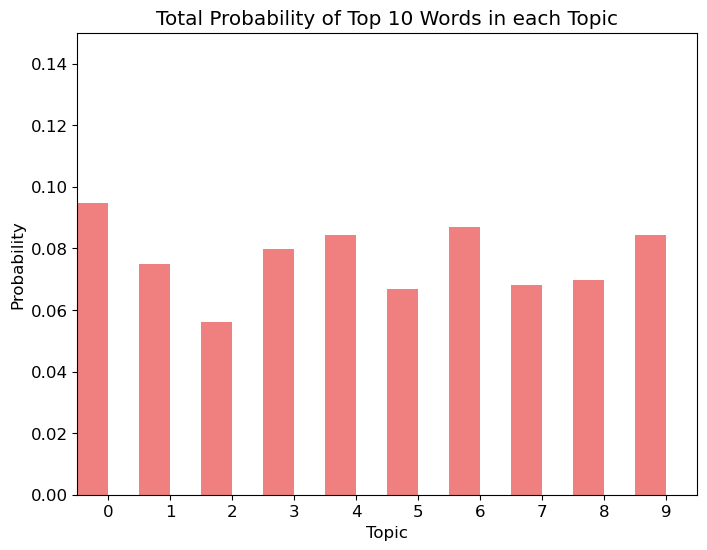

In [43]:
import matplotlib.pyplot as plt
import numpy as np
# total weight assigned by each topic to its top 10 words
top_probs = []
top_n_words = 10
topics = lda_model.show_topics(num_words = top_n_words, formatted = False)
for _, infos in topics:
    prob = sum([prob for _, prob in infos])
    top_probs.append(prob)

ind = np.arange(top_n_words)
width = 0.5

fig, ax = plt.subplots()

ax.bar(ind - (width / 2), top_probs, width, color = 'lightcoral')
ax.set_xticks(ind)

plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Total Probability of Top 10 Words in each Topic')
plt.xlim(-0.5, 9.5)
plt.ylim(0, 0.15)
plt.show()

In [45]:
from collections import Counter
topics = lda_model.show_topics(formatted=False, num_topics = 32)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

topic_weight = []
topic_words = []
for i, topic in topics:
  word_weight = []
  words=[]
  for word, weight in topic:
      word_weight.append(weight)
      words.append(word)
  topic_weight.append(word_weight)
  topic_words.append(words)

#Distance based approach 
from sklearn.metrics.pairwise import euclidean_distances
distanceMatrix =  euclidean_distances(topic_weight,topic_weight)
def cluster_by_distance_matrix(distanceMatrix, resolution_parameter = 1.5):
    """
    This method partitions input data by applying the louvain algorithm
    on a given distance matrix.
    A similarity matrix is computed from the distance matrix and its elements
    will serve as edge weights.
    """
    # convert distance matrix to similariy matrix
    distanceMatrix = 1- distanceMatrix/np.max(distanceMatrix)
    edges = np.unravel_index(np.arange(distanceMatrix.shape[0]*distanceMatrix.shape[1]), distanceMatrix.shape)
    edges = list(zip(*edges))
    weights = distanceMatrix.ravel()
    
    g = ig.Graph(directed=False)
    g.add_vertices(distanceMatrix.shape[0])  # each observation is a node
    g.add_edges(edges)
    
    g.es['weight'] = weights
    weights = np.array(g.es["weight"]).astype(np.float64)
    partition_type = louvain.RBConfigurationVertexPartition
    partition_kwargs = {}
    partition_kwargs["weights"] = weights
    partition_kwargs["resolution_parameter"] = resolution_parameter
    part = louvain.find_partition(g, partition_type, **partition_kwargs)
    groups = np.array(part.membership)
    return groups
#Connectivity based approach 
def cluster_by_connectivity(data, neighbors = 10, resolution_parameter = 1):
    """
    This method partitions input data by applying the louvain algorithm
    on the connectivity binary matrix returned by the kneighbors graph.
    """
    A = kneighbors_graph(data, neighbors, mode='distance', include_self=True)
    sources, targets = A.nonzero()
    weights = A[sources, targets]
    if isinstance(weights, np.matrix): # ravel data
        weights = weights.A1
    g = ig.Graph(directed=False)
    g.add_vertices(A.shape[0])  # each observation is a node
    edges = list(zip(sources, targets))
    g.add_edges(edges)
    
    g.es['weight'] = weights
    weights = np.array(g.es["weight"]).astype(np.float64)
    partition_type = louvain.RBConfigurationVertexPartition
    partition_kwargs = {}
    partition_kwargs["weights"] = weights
    partition_kwargs["resolution_parameter"] = resolution_parameter
    part = louvain.find_partition(g, partition_type, **partition_kwargs)
    groups = np.array(part.membership)
    return groups

from sklearn.neighbors import kneighbors_graph
import louvain
import igraph as ig 
cluster = cluster_by_connectivity(distanceMatrix, resolution_parameter = 1.5)

ModuleNotFoundError: No module named 'louvain'